In [13]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = fetch_20newsgroups(subset='all') # subset='all' means we want all the data ( train + test)
prefix = "/home/codespace/scikit_learn_data/20news_home/"
df = pd.DataFrame({'text': news.data, 'category': news.target, 'filename': news.filenames})
# removing the prefix from the filename
df['topic'] = df['filename'].apply(lambda x: x.replace(prefix, "").split("/")[1])
df.head()
# filter rows with category 10
df[df['category'] == 10].head()

,text,category,filename,topic
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,/home/codespace/scikit_learn_data/20news_home/...,rec.sport.hockey
7,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,/home/codespace/scikit_learn_data/20news_home/...,rec.sport.hockey
8,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,/home/codespace/scikit_learn_data/20news_home/...,rec.sport.hockey
24,From: cs902043@ariel.yorku.ca (SHAWN LUDDINGTO...,10,/home/codespace/scikit_learn_data/20news_home/...,rec.sport.hockey
44,From: gritter@cs.purdue.edu (Carl Gritter)\nSu...,10,/home/codespace/scikit_learn_data/20news_home/...,rec.sport.hockey


In [38]:
import re
import spacy
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm")

def extract_user_info_ml(article):
    # Process the article using spaCy
    doc = nlp(article)
    
    user_name = None
    email = None

    # Extract user name and email from PERSON and EMAIL entities
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            user_name = ent.text
        elif ent.label_ == "EMAIL":
            email = ent.text

    return user_name, email

# Fetch the 20 Newsgroups dataset
news = fetch_20newsgroups(subset='all')
prefix = "/home/codespace/scikit_learn_data/20news_home/"

# Create a DataFrame
df = pd.DataFrame({'text': news.data, 'category': news.target, 'filename': news.filenames})
df['topic'] = df['filename'].apply(lambda x: x.replace(prefix, "").split("/")[1])

# Extract user name and email for each article
df['user_name'], df['email'] = zip(*df['text'].apply(extract_user_info_ml).apply(lambda x: (x[0], x[1])))

# Display the DataFrame
print(df.head())

# Filter rows with category 10
df_category_10 = df[df['category'] == 10]
print(df_category_10.head())



                                                text  category  \
0  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...        10   
1  From: mblawson@midway.ecn.uoknor.edu (Matthew ...         3   
2  From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...        17   
3  From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...         3   
4  From: Alexander Samuel McDiarmid <am2o+@andrew...         4   

                                            filename  \
0  /home/codespace/scikit_learn_data/20news_home/...   
1  /home/codespace/scikit_learn_data/20news_home/...   
2  /home/codespace/scikit_learn_data/20news_home/...   
3  /home/codespace/scikit_learn_data/20news_home/...   
4  /home/codespace/scikit_learn_data/20news_home/...   

                      topic        user_name email  
0          rec.sport.hockey             Pens  None  
1  comp.sys.ibm.pc.hardware  B.C.             None  
2     talk.politics.mideast       Hilmi Eren  None  
3  comp.sys.ibm.pc.hardware      Tel Hoskyns  None  
4

In [37]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



def remove_stopwords(text):
    """Remove stopwords from a text"""
    words = text.split()
    return " ".join([word for word in words if word not in stop_words])



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
!pip3 install beautifulsoup4


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [16]:
# A test attempt to extract name and email from text
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('punkt')

def strip_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def strip_numeric(text):
    return re.sub(r'\d+', '', text)

def strip_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def strip_multiple_whitespaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def transform_to_lower(text):
    return text.lower()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def remove_single_char(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if len(word) > 1]
    return ' '.join(filtered_words)

def clean_text(text):
    if text is None:
        return ""
    text = strip_tags(text)
    text = strip_numeric(text)
    text = strip_punctuation(text)
    text = strip_multiple_whitespaces(text)
    text = transform_to_lower(text)
    text = remove_stopwords(text)
    text = remove_single_char(text)
    return text

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_1658/1955126427.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [17]:
df.head()

,text,category,filename,topic,clean_text
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,/home/codespace/scikit_learn_data/20news_home/...,rec.sport.hockey,mamatha devineni ratnam subject pens fans reac...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,/home/codespace/scikit_learn_data/20news_home/...,comp.sys.ibm.pc.hardware,mblawsonmidwayecnuoknoredu matthew lawson subj...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,/home/codespace/scikit_learn_data/20news_home/...,talk.politics.mideast,hilmierdsvsuse hilmi eren subject armenia says...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,/home/codespace/scikit_learn_data/20news_home/...,comp.sys.ibm.pc.hardware,guydaustinibmcom guy dawson subject ide vs scs...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,/home/codespace/scikit_learn_data/20news_home/...,comp.sys.mac.hardware,alexander samuel mcdiarmid subject driver orga...


In [30]:
# write the first 5 texts to a file
with open('sample.txt', 'w') as f:
    for text in df['text'][:5]:
        f.write(text + '\n')

<Axes: xlabel='topic'>

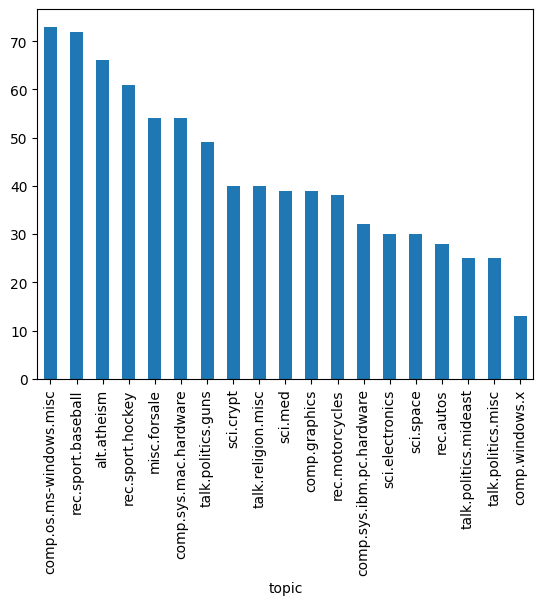

In [23]:
# count of  articles that start with From in the text
df[df['text'].str.startswith("From")].shape[0]

# count of  articles that start withou From in the text
df[~df['text'].str.startswith("From")].shape[0]

without_from = df[~df['text'].str.startswith("From")]
without_from.head()

# bar plot of the categories of without_from
without_from['topic'].value_counts().plot(kind='bar')


In [26]:
without_from
# starting word of the text in a new column
without_from['starting_word'] = without_from['text'].apply(lambda x: x.split()[0])

/tmp/ipykernel_1658/344941306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_from['starting_word'] = without_from['text'].apply(lambda x: x.split()[0])


In [28]:
# unique starting words
without_from['starting_word'].unique()

array(['Subject:', 'Organization:', 'Distribution:',
       'egsner!ernest!m2.dseg.ti.com!tilde.csc.ti.com!mksol!kerr.dseg.ti.com!kkerr@mkcase1.dseg.ti.com',
       'howland.reston.ans.net!europa.eng.gtefsd.com!uunet!mcsun!Germany.EU.net!news.dfn.de!tubsibr!dbstu1.rz.tu-bs.de!I3150101',
       'Nntp-Posting-Host:',
       'zaphod.mps.ohio-state.edu!wupost!uunet!olivea!sgigate!odin!fido!solntze.wpd.sgi.com!livesey',
       'Reply-To:',
       'uunet!olivea!sgigate!sgiblab!adagio.panasonic.com!nntp-server.caltech.edu!keith',
       'X-Mailer:',
       'agate!iat.holonet.net!psinntp!psinntp!megatest!mithril!alung',
       'howland.reston.ans.net!usenet.ins.cwru.edu!news.csuohio.edu!vmcms.csuohio.edu!R1328',
       'howland.reston.ans.net!noc.near.net!uunet!newsstand.cit.cornell.edu!vax5.cit.cornell.edu!yecx',
       'agate!ames!purdue!mentor.cc.purdue.edu!sage.cc.purdue.edu!kari',
       'zaphod.mps.ohio-state.edu!usc!elroy.jpl.nasa.gov!nntp-server.caltech.edu!juliet.caltech.edu!lmh',
   

In [20]:
df.shape[0]

18846